In [32]:
import numpy as np
import timeit

def update(lattice):
    box_length = len(lattice) - 2
    lattice_new = [[0 for _ in range(box_length + 2)] for _ in range(box_length + 2)]
    
    for i in range(1, box_length + 1):
        for j in range(1, box_length + 1):
            lattice_new[i][j] = update_rule(lattice, i, j)
    return lattice_new

def update_rule(lattice, i, j):
    n_neigh = lattice[i + 1][j] + lattice[i][j + 1] + lattice[i + 1][j + 1] + \
              lattice[i - 1][j] + lattice[i][j - 1] + lattice[i - 1][j - 1] + \
              lattice[i - 1][j + 1] + lattice[i + 1][j - 1]
    
    if (lattice[i][j] == 1) and (n_neigh in [2, 3]):
        return 1
    elif lattice[i][j] == 1:
        return 0
    elif (lattice[i][j] == 0) and (n_neigh == 3):
        return 1
    else:
        return 0


#mide el timepo de ejecucion cuando el box size es 300

def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update(lattice)
    return lattice

if __name__ == '__main__':
    print(timeit.timeit(main, number=1))



import csv
with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['python', timeit.timeit(main, number=1)])

13.311614132999239


In [33]:
!pip install cython
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [34]:
%%writefile setup.py
from distutils.core import setup
from Cython.Build import cythonize

setup(
    ext_modules=cythonize([
        
        "cython1.pyx",  # Añade tus archivos .pyx aquí
        "cython2.pyx",
        "cython3.pyx",
        "cython4.pyx",
    ]),
)

Overwriting setup.py


In [35]:
!python setup.py build_ext --inplace

In [36]:
from cython1 import update as update_cython1

def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython1(lattice)
    return lattice


if __name__ == '__main__':
    print(timeit.timeit(main, number=1))
    
    
#agregar el time en el archivo csv con el nombre de cython1

import csv
with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['cython1', timeit.timeit(main, number=1)])

5.943676938999488


In [37]:


from cython2 import update as update_cython2


import numpy as np
import timeit

def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython2(lattice)
    return lattice

if __name__ == '__main__':
    print(timeit.timeit(main, number=1))
    
    
import csv
with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['cython2', timeit.timeit(main, number=1)])

2.9767842090004706


In [38]:
from cython3 import update as update_cython3

import numpy as np
import timeit

def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython3(lattice)
    return lattice

if __name__ == '__main__':
    print(timeit.timeit(main, number=1))
    
    
import csv
with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['cython3', timeit.timeit(main, number=1)])

2.546062860999882


In [39]:
from cython4 import update as update_cython4

def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython4(lattice)
    return lattice
    
    
if __name__ == '__main__':
    print(timeit.timeit(main, number=1))
    
import csv
with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['cython4', timeit.timeit(main, number=1)])
    

2.413097718001154


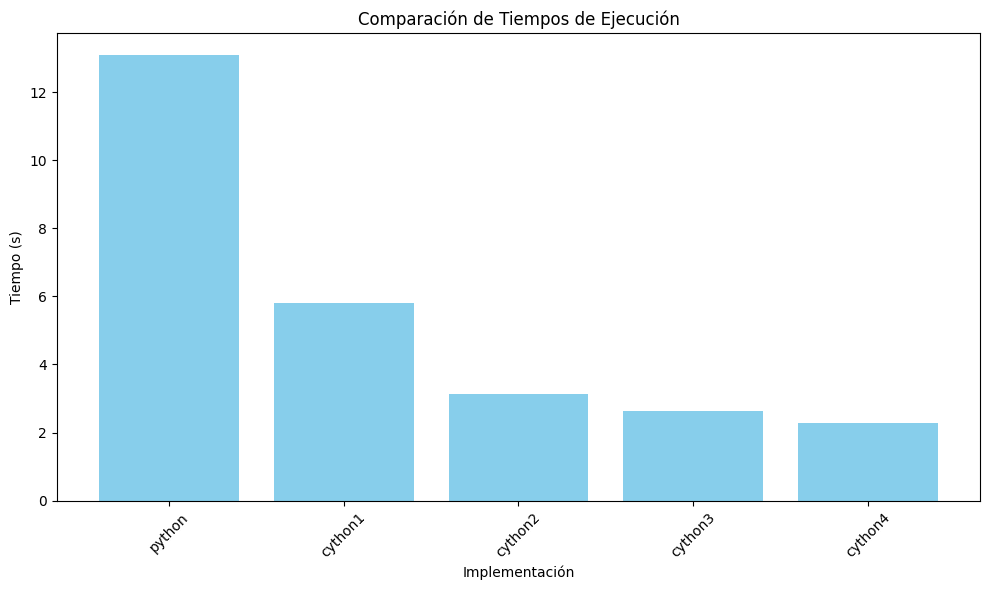

In [40]:

import pandas as pd


data = pd.read_csv('time.csv')


import matplotlib.pyplot as plt


labels = data.iloc[:, 0].tolist()
labels.insert(0, 'python') 
times = data.iloc[:, 1].tolist()
times.insert(0, 13.096366302000206)  

# Creando la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(labels, times, color='skyblue')
plt.title('Comparación de Tiempos de Ejecución')
plt.xlabel('Implementación')
plt.ylabel('Tiempo (s)')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrando la gráfica
plt.show()
